__Hoja de trabajo Proyecto BMW - Toni__

In [1511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [1512]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### 1.- Importamos los datos a un DataFrame

In [1513]:
bmw=pd.read_csv('dataset/bmw_pricing_v3.csv')

In [1514]:
bmw.shape

(4843, 18)

In [1515]:
bmw.sample(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4031,BMW,X3,144804.0,135.0,2014-03-01,diesel,black,suv,False,True,False,NaN,True,False,True,True,18600.0,2018-03-01
1501,BMW,318,100805.0,105.0,2013-09-01,diesel,grey,estate,False,True,False,NaN,True,False,True,False,14400.0,2018-07-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01
3659,BMW,318,212836.0,85.0,NaN,diesel,silver,subcompact,False,False,False,False,False,False,True,False,1400.0,2018-02-01
4737,BMW,X1,32347.0,130.0,NaN,diesel,blue,suv,False,True,True,False,False,False,True,NaN,13400.0,2018-08-01


In [1516]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [1517]:
bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


### __2.- Análisis de duplicados__

Vemos que no hay duplicados

In [1518]:
bmw.duplicated().value_counts()

False    4843
Name: count, dtype: int64

In [1519]:
bmw[bmw.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


### __3.- Análisis de nulos__

In [1520]:
bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.1- MARCA

In [1521]:
bmw.marca.unique()

array([nan, 'BMW'], dtype=object)

In [1522]:
bmw.marca.value_counts(dropna=False, normalize=True)

marca
BMW    0.799711
NaN    0.200289
Name: proportion, dtype: float64

In [1523]:
bmw2=bmw.copy()

In [1524]:
del(bmw2['marca'])

In [1525]:
bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


- 3.2- FECHA_REGISTRO

In [1526]:
bmw2.fecha_registro.value_counts(dropna=False, normalize=True)*100

fecha_registro
NaN           50.030973
2013-07-01     1.920297
2014-03-01     1.713814
2014-05-01     1.672517
2013-01-01     1.610572
2013-10-01     1.589924
2014-02-01     1.527979
2013-06-01     1.383440
2014-01-01     1.383440
2013-02-01     1.383440
2013-11-01     1.259550
2012-10-01     1.259550
2013-04-01     1.218253
2014-04-01     1.197605
2013-09-01     1.197605
2013-03-01     1.197605
2013-08-01     1.115011
2012-06-01     1.115011
2014-07-01     1.115011
2014-09-01     1.011770
2013-05-01     0.949824
2014-08-01     0.929176
2012-11-01     0.887879
2012-03-01     0.867231
2014-06-01     0.846583
2013-12-01     0.825934
2012-01-01     0.722693
2014-10-01     0.722693
2014-11-01     0.702044
2012-04-01     0.702044
2012-07-01     0.681396
2012-09-01     0.660747
2012-08-01     0.598802
2015-03-01     0.578154
2012-05-01     0.557506
2012-12-01     0.536857
2012-02-01     0.392319
2015-06-01     0.392319
2015-10-01     0.392319
2015-01-01     0.371670
2015-05-01     0.371670
2

Demasiados nulos; la eliminamos.

In [1527]:
bmw3=bmw2.copy()

In [1528]:
del(bmw3['fecha_registro'])

In [1529]:
bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.3- COLOR

In [1530]:
bmw3.color.value_counts(dropna=False,normalize=True)*100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

9,18% de nulos de la muestra total. No los eliminamos. Imputamos le valor 'sin_info_color'

In [1531]:
bmw4=bmw3.copy()

In [1532]:
bmw4['color'].fillna('otros',inplace=True)

In [1533]:
bmw4.color.value_counts(dropna=False,normalize=True)*100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
otros      9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

In [1534]:
bmw4.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.4- TIPO_COCHE

In [1535]:
bmw4.tipo_coche.value_counts(dropna=False,normalize=True)*100

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

30.14% de nulos. No los podemos eliminar al ser infomración valiosa

In [1536]:
bmw4.tipo_coche.value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [1537]:
bmw4.groupby(['modelo', 'tipo_coche'], dropna = False)['modelo'].count()

modelo             tipo_coche 
 Active Tourer     van              1
114                hatchback        6
                   subcompact       4
                   NaN              5
116                estate           2
                   hatchback      191
                   sedan            3
                   subcompact      56
                   NaN            106
118                convertible      1
                   coupe            2
                   hatchback       79
                   sedan            3
                   subcompact      13
                   NaN             45
120                convertible      4
                   hatchback       16
                   sedan            1
                   subcompact       2
                   NaN             13
123                hatchback        1
                   NaN              1
125                hatchback        5
135                convertible      1
                   coupe            1
                   

In [1538]:
bmw5=bmw4.copy()

In [1539]:
bmw5.tipo_coche.fillna('otros',inplace=True)

In [1540]:
bmw5.tipo_coche.value_counts(normalize=True)*100

tipo_coche
otros          30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

In [1541]:
bmw5.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.5.- AIRE_ACONDICIONADO

In [1542]:
bmw5.aire_acondicionado.value_counts(dropna=False,normalize=True)*100

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

In [1543]:
bmw6=bmw5.copy()

In [1544]:
bmw6.aire_acondicionado.fillna('sin_info',inplace=True)

In [1545]:
bmw6.aire_acondicionado.value_counts(dropna=False,normalize=True)*100

aire_acondicionado
True        71.546562
False       18.418336
sin_info    10.035102
Name: proportion, dtype: float64

In [1546]:
bmw6.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado                0
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.6.- ASIENTOS_TRASEROS_PLEGABLES

In [1547]:
bmw6.asientos_traseros_plegables.value_counts(dropna=False,normalize=True)*100

asientos_traseros_plegables
NaN      70.018584
False    23.745612
True      6.235804
Name: proportion, dtype: float64

In [1548]:
bmw7=bmw6.copy()

In [1549]:
del(bmw7['asientos_traseros_plegables'])

In [1550]:
bmw7.isnull().sum()

modelo                    3
km                        2
potencia                  1
tipo_gasolina             5
color                     0
tipo_coche                0
volante_regulable         4
aire_acondicionado        0
camara_trasera            2
elevalunas_electrico      2
bluetooth               728
gps                       0
alerta_lim_velocidad    728
precio                    6
fecha_venta               1
dtype: int64

- 3.7.- BLUETOOTH

In [1551]:
bmw7.bluetooth.value_counts(dropna=False,normalize=True)*100

bluetooth
False    64.402230
True     20.565765
NaN      15.032005
Name: proportion, dtype: float64

In [1552]:
bmw8=bmw7.copy()

In [1553]:
bmw8.bluetooth.fillna('sin_info',inplace=True)

In [1554]:
bmw8.isnull().sum()

modelo                    3
km                        2
potencia                  1
tipo_gasolina             5
color                     0
tipo_coche                0
volante_regulable         4
aire_acondicionado        0
camara_trasera            2
elevalunas_electrico      2
bluetooth                 0
gps                       0
alerta_lim_velocidad    728
precio                    6
fecha_venta               1
dtype: int64

- 3.8.- ALERTA_LIM_VELOCIDAD

In [1555]:
bmw8.alerta_lim_velocidad.value_counts(dropna=False,normalize=True)*100

alerta_lim_velocidad
True     46.252323
False    38.715672
NaN      15.032005
Name: proportion, dtype: float64

In [1556]:
bmw9=bmw8.copy()

In [1557]:
bmw9.alerta_lim_velocidad.fillna('sin_info',inplace=True)

In [1558]:
bmw9.isnull().sum()

modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

3.9.- Categorías con pocos nulos.


    3.9.1.- MODELO

In [1559]:
bmw9[bmw9.modelo.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,diesel,black,otros,False,True,False,False,sin_info,True,sin_info,13300.0,2018-08-01
4766,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,diesel,white,otros,False,False,False,False,False,False,False,800.0,2018-03-01


Evaluamos los 3 nulos de forma individual

In [1560]:
#Vehículo indice 173
bmw9[(bmw9['potencia']==105) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==True)]['modelo'].value_counts(normalize=True)*100

modelo
318                 63.106796
X1                  11.650485
118                 10.679612
318 Gran Turismo     9.708738
X3                   3.883495
525                  0.970874
Name: proportion, dtype: float64

In [1561]:
#Imputamos el modelo 318
bmw9.loc[[173],['modelo']]='318'

In [1562]:
#Checkeo
bmw9.loc[[173]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,318,146338.0,105.0,diesel,black,otros,False,True,False,False,sin_info,True,sin_info,13300.0,2018-08-01


In [1563]:
#Vehículo indice 4766
bmw9[(bmw9['potencia']==105) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==True)&(bmw9['volante_regulable']==False)&(bmw9['gps']==True)&(bmw9['tipo_coche']=='suv')&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X1    62.5
X3    37.5
Name: proportion, dtype: float64

In [1564]:
#Imputamos el modelo X1
bmw9.loc[[4766],['modelo']]='X1'

In [1565]:
#chekeo
bmw9.loc[[4766]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4766,X1,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01


In [1566]:
#Vehículo indice 4802
bmw9[(bmw9['potencia']==110) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==False)&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X3     33.333333
218    33.333333
318    16.666667
X1     16.666667
Name: proportion, dtype: float64

In [1567]:
#Vehículo indice 4802
bmw9[(bmw2['potencia']==110) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==False)&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X3     33.333333
218    33.333333
318    16.666667
X1     16.666667
Name: proportion, dtype: float64

In [1568]:
#No podemos imputar un valor más probable.
#Lo eliminamos
bmw9=bmw9.drop(index=4802)

In [1569]:
#bmw9.loc[[4802]]

In [1570]:
bmw9.isnull().sum()

modelo                  0
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.2.- KM

In [1571]:
bmw9[bmw9['km'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,diesel,black,otros,True,True,True,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,diesel,blue,van,True,True,True,True,False,True,True,19500.0,2018-07-01


No podemos imputar de ninguna manera los KM de cada vehículo. Los eliminamos.

In [1572]:
bmw9.dropna(subset='km', inplace=True)

In [1573]:
bmw9[bmw9['km'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [1574]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.3.- POTENCIA

In [1575]:
bmw9[bmw9['potencia'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,diesel,black,estate,False,True,False,False,False,True,True,18700.0,2018-03-01


In [1576]:
#Podemos averigual la potencia segun modelo y otras variables?
bmw9[['modelo','potencia','tipo_gasolina','tipo_coche','volante_regulable','aire_acondicionado','elevalunas_electrico']][(bmw9['modelo']=='525')&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==True)&(bmw9['elevalunas_electrico']==False)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,elevalunas_electrico,count
0,525,160.0,diesel,estate,False,True,False,4


In [1577]:
#Imputamos el valor 160
bmw9.loc[[181],['potencia']]=160.0

In [1578]:
bmw9[bmw9['potencia'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [1579]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.4.- TIPO_GASOLINA

In [1580]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,NaN,black,otros,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [1581]:
#Evaluamos el modelo 420 (indice 82) para ver si podemos imputar el tipo_gasolina
bmw9[['modelo','potencia','tipo_gasolina','volante_regulable','aire_acondicionado']][(bmw9['modelo']=='420')&(bmw9['potencia']==135)&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==False)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,volante_regulable,aire_acondicionado,count
0,420,135.0,diesel,False,False,7


In [1582]:
#Imputamos el valor 'diesel'
bmw9.loc[[82],['tipo_gasolina']]='diesel'
#check
bmw9.loc[[82],['tipo_gasolina']]

,tipo_gasolina
82,diesel


In [1583]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [1584]:
#Evaluamos el modelo 320 (indice 185) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado']][(bmw9['modelo']=='320')&(bmw9['potencia']==135)&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==False)].value_counts().reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,count
0,diesel,320,135.0,estate,False,False,22


In [1585]:
#Imputamos el valor 'diesel'
bmw9.loc[[185],['tipo_gasolina']]='diesel'
bmw9.loc[[185],['tipo_gasolina']]

C:\Users\toniv\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,tipo_gasolina
185,diesel


In [1586]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [1587]:
#Evaluamos el modelo 318 (indice 444) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad']][(bmw9['modelo']=='318')&(bmw9['potencia']==100)&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==True)&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['alerta_lim_velocidad']==True)].value_counts(normalize=True).reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,proportion
0,diesel,318,100.0,estate,True,True,False,False,False,True,0.857143
1,petrol,318,100.0,estate,True,True,False,False,False,True,0.142857


In [1588]:
#Imputamos el valor 'diesel'
bmw9.loc[[444],['tipo_gasolina']]='diesel'
bmw9.loc[[444],['tipo_gasolina']]

,tipo_gasolina
444,diesel


In [1589]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [1590]:
#Evaluamos el modelo 318 (indice 480) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad']][(bmw9['modelo']=='318')&(bmw9['potencia']==105)&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['alerta_lim_velocidad']==False)].value_counts(normalize=True).reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,proportion
0,diesel,318,105.0,estate,False,True,False,False,False,False,0.6
1,diesel,318,105.0,otros,False,True,False,False,False,False,0.2
2,diesel,318,105.0,sedan,False,True,False,False,False,False,0.2


In [1591]:
#Imputamos el valor 'diesel'
bmw9.loc[[480],['tipo_gasolina']]='diesel'
bmw9.loc[[480],['tipo_gasolina']]

,tipo_gasolina
480,diesel


In [1592]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [1593]:
#Evaluamos el modelo 318 (indice 630) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad','gps']][(bmw9['modelo']=='318')&(bmw9['potencia']==105)&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['alerta_lim_velocidad']==True)&(bmw9['gps']==False)].value_counts(normalize=True).reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps,proportion
0,diesel,318,105.0,estate,False,False,False,False,False,True,False,0.50
1,diesel,318,105.0,estate,False,True,False,False,False,True,False,0.25
2,diesel,318,105.0,estate,False,sin_info,False,False,False,True,False,0.25


In [1594]:
#Imputamos el valor 'diesel'
bmw9.loc[[630],['tipo_gasolina']]='diesel'
bmw9.loc[[630],['tipo_gasolina']]

,tipo_gasolina
630,diesel


In [1595]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [1596]:
bmw9.isna().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.5.- VOLANTE_REGULABLE

In [1597]:
bmw9[bmw9['volante_regulable'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,True,False,True,sin_info,11900.0,2018-06-01
273,318,195032.0,100.0,diesel,grey,otros,NaN,sin_info,False,False,False,True,False,4900.0,2018-01-01
489,320,227691.0,135.0,diesel,black,otros,NaN,True,False,False,True,True,False,10500.0,2018-02-01
614,318,201626.0,105.0,diesel,black,otros,NaN,sin_info,False,True,False,True,True,11700.0,2018-03-01


In [1598]:
#Evaluamos el modelo 320 (indice 66) para ver si podemos imputar el volante_regulable
bmw9[['volante_regulable','tipo_gasolina','modelo','potencia','tipo_coche','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad','gps']][(bmw9['modelo']=='320')&(bmw9['potencia']==135)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='coupe')&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['gps']==True)].value_counts(normalize=True).reset_index()

,volante_regulable,tipo_gasolina,modelo,potencia,tipo_coche,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps,proportion


In [1599]:
#Los eliminamos
bmw9.dropna(subset='volante_regulable',inplace=True)

In [1600]:
bmw9[bmw9['volante_regulable'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [1601]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.6.- CAMARA_TRASERA

In [1602]:
bmw9[bmw9['camara_trasera'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,520,163675.0,135.0,diesel,otros,estate,True,True,NaN,True,sin_info,True,True,14900.0,2018-01-01
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin_info,True,sin_info,11700.0,2018-04-01


In [1603]:
#Evaluamos el modelo 520 (indice 291) para ver si podemos imputar la camara_trasera
bmw9[['camara_trasera','modelo', 'potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='520')&(bmw9['potencia']==135)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True)

camara_trasera  modelo  potencia  tipo_gasolina  tipo_coche
False           520     135.0     diesel         estate        0.709677
True            520     135.0     diesel         estate        0.290323
Name: proportion, dtype: float64

In [1604]:
#Imputamos el valro False
bmw9.loc[[291],['camara_trasera']]=False
bmw9.loc[291]['camara_trasera']

False

In [1605]:
bmw9[bmw9['camara_trasera'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin_info,True,sin_info,11700.0,2018-04-01


In [1606]:
#Evaluamos el modelo 316 (indice 409) para ver si podemos imputar la camara_trasera
bmw9[['camara_trasera','modelo', 'potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='316')&(bmw9['potencia']==85)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True)

camara_trasera  modelo  potencia  tipo_gasolina  tipo_coche
False           316     85.0      diesel         estate        0.948718
True            316     85.0      diesel         estate        0.051282
Name: proportion, dtype: float64

In [1607]:
#Imputamos el valro False
bmw9.loc[[409],['camara_trasera']]=False
bmw9.loc[409]['camara_trasera']

False

In [1608]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.7.- ELEVALUNAS_ELECTRICO

In [1609]:
bmw9[bmw9['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,diesel,otros,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [1610]:
#Evaluamos el modelo 640 (indice 63) para ver si podemos imputar los elevalunas_electricos
bmw9[['elevalunas_electrico','modelo','potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='640')&(bmw9['potencia']==230)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='coupe')].value_counts(normalize=True)

elevalunas_electrico  modelo  potencia  tipo_gasolina  tipo_coche
True                  640     230.0     diesel         coupe         1.0
Name: proportion, dtype: float64

In [1611]:
#imputamos el valor True
bmw9.loc[[63],['elevalunas_electrico']]=True
bmw9.loc[63]['elevalunas_electrico']

True

In [1612]:
bmw9[bmw9['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [1613]:
#Evaluamos el modelo 535 (indice 305) para ver si podemos imputar los elevalunas_electricos
bmw9[['elevalunas_electrico','modelo','potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='535')&(bmw9['potencia']==230)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True)

elevalunas_electrico  modelo  potencia  tipo_gasolina  tipo_coche
True                  535     230.0     diesel         estate        0.9
False                 535     230.0     diesel         estate        0.1
Name: proportion, dtype: float64

In [1614]:
#imputamos el valor True
bmw9.loc[[305],['elevalunas_electrico']]=True
bmw9.loc[305]['elevalunas_electrico']

True

In [1615]:
bmw9[bmw9['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [1616]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.8.- PRECIO

Precio es la variable TARGET a predecir. Eliminamos los nulos d precio directamente.

In [1617]:
bmw9.dropna(subset='precio',inplace=True)

In [1618]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             1
dtype: int64

    3.9.9.- FECHA_VENTA

No hay forma de saber la fecha de venta de un coche. Eliminamos el nulo directamente.

In [1619]:
bmw9.dropna(subset='fecha_venta',inplace=True)

In [1620]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

Reseteamos el indice del DataFrame ya que hemos eliminado varios elementos. De esta forma no quedarán huecos vacíos de indices.

In [1621]:
bmw10=bmw9.copy()

In [1622]:
bmw10.reset_index(drop=True,inplace=True)

In [1623]:
bmw10.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

### 4.- Analisis Univariable

In [1624]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   object 
 7   aire_acondicionado    4829 non-null   object 
 8   camara_trasera        4829 non-null   object 
 9   elevalunas_electrico  4829 non-null   object 
 10  bluetooth             4829 non-null   object 
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   object 
 13  precio                4829 non-null   float64
 14  fecha_venta           4829 non-null   object 
dtypes: bool(1), float64(3

- 4.1.- Evaluamos si hay variables que se puedan convertir a boleanas

In [1625]:
bmw10['volante_regulable'].unique()
#Sólo tiene 2 valores (True/False). Puede convertirse a boleana.

array([True, False], dtype=object)

In [1626]:
#Convertimos a boleana
bmw10['volante_regulable']=bmw10['volante_regulable'].astype(bool)

In [1627]:
bmw10['aire_acondicionado'].unique()
#Tiene 3 valores, NO puede convertirse a boleana

array([True, False, 'sin_info'], dtype=object)

In [1628]:
bmw10['camara_trasera'].unique()
#Sólo tiene 2 valores (True/False). Puede convertirse a boleana.

array([False, True], dtype=object)

In [1629]:
#Convertimos a boleana
bmw10['camara_trasera']=bmw10['camara_trasera'].astype(bool)

In [1630]:
bmw10['elevalunas_electrico'].unique()
#Sólo tiene 2 valores (True/False). Puede convertirse a boleana.

array([True, False], dtype=object)

In [1631]:
#Convertimos a boleana
bmw10['elevalunas_electrico']=bmw10['elevalunas_electrico'].astype(bool)

In [1632]:
bmw10['bluetooth'].unique()
#Tiene 3 valores, NO puede convertirse a boleana

array(['sin_info', True, False], dtype=object)

In [1633]:
bmw10['alerta_lim_velocidad'].unique()
#Tiene 3 valores, NO puede convertirse a boleana

array(['sin_info', True, False], dtype=object)

In [1634]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   bool   
 7   aire_acondicionado    4829 non-null   object 
 8   camara_trasera        4829 non-null   bool   
 9   elevalunas_electrico  4829 non-null   bool   
 10  bluetooth             4829 non-null   object 
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   object 
 13  precio                4829 non-null   float64
 14  fecha_venta           4829 non-null   object 
dtypes: bool(4), float64(3

- 4.2.- Listamos las variables según si son numéricas, boleanas o categóricas y las evaluamos

In [1635]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [1636]:
num,bol,cat=obtener_lista_variables(bmw10)

In [1637]:
num

['km', 'potencia']

In [1638]:
bol

['volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'gps']

In [1639]:
cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

    - 4.2.1- Variables numéricas

In [1640]:
bmw10[num].describe()
#Observamos que 'km' tiene valores negtivos y puede tener outliers
#'potencia' tiene un 0 como valor mínimo, lo que parece extraño y podría considerarse como outlier; el valor máximo también podría serlo.

,km,potencia
count,4.829000e+03,4829.000000
mean,1.409126e+05,129.001864
std,6.020077e+04,39.026898
min,-6.400000e+01,0.000000
25%,1.028560e+05,100.000000
50%,1.410630e+05,120.000000
75%,1.751740e+05,135.000000
max,1.000376e+06,423.000000


    - 4.2.1.1- KM

In [1641]:
bmw11['km']=bmw11['km'].astype('int32')

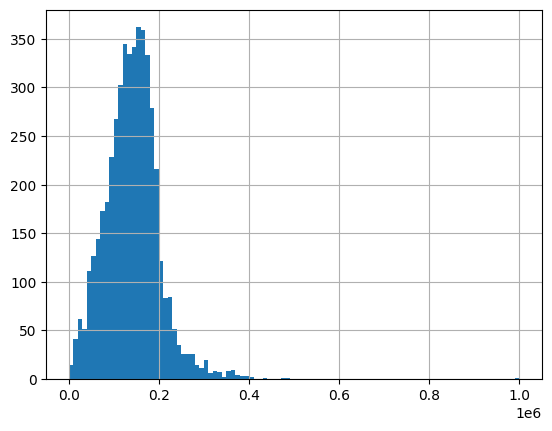

In [1642]:
bmw10.km.hist(bins=100);

In [1643]:
bmw10.km.describe()

count    4.829000e+03
mean     1.409126e+05
std      6.020077e+04
min     -6.400000e+01
25%      1.028560e+05
50%      1.410630e+05
75%      1.751740e+05
max      1.000376e+06
Name: km, dtype: float64

In [1644]:
bmw10[(bmw10['km']<0) | (bmw10['km']>1e+06)]


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2926,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01
3720,118,1000376.0,90.0,diesel,otros,otros,True,False,False,False,sin_info,True,False,1400.0,2018-06-01


In [1645]:
bmw11=bmw10.copy()

In [1646]:
#Eliminamos el valor negativo que no tiene sentido y el outlier
del_ind=bmw11[(bmw11['km']<0) | (bmw11['km']>1e+06)].index.tolist()
del_ind


[2926, 3720]

In [1647]:
bmw11.drop(index=del_ind,inplace=True)

In [1648]:
bmw11[(bmw11['km']<0) | (bmw11['km']>1e+06)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


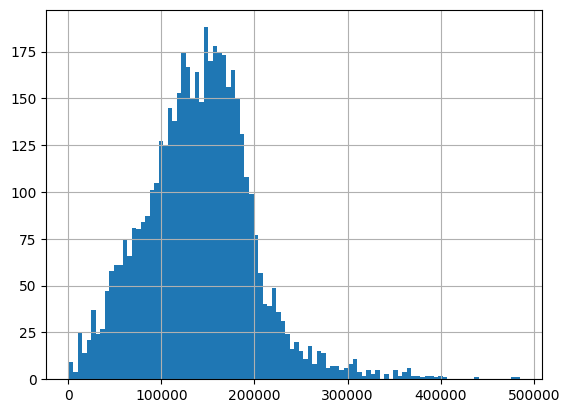

In [1649]:
bmw11.km.hist(bins=100);

In [1650]:
bmw11[['km']][(bmw11['km']>4e+05)]

,km
549,484615.0
1561,400654.0
2338,477571.0
2817,439060.0
3186,405816.0


In [1651]:
#Eliminamos outliers por encima de 400k KM
bmw11.drop(index=bmw11[['km']][(bmw11['km']>4e+05)].index.tolist(),inplace=True)

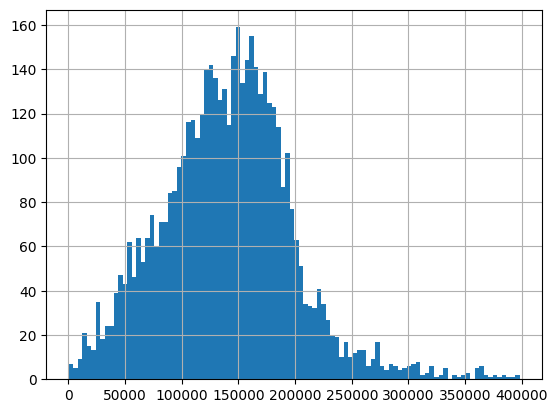

In [1652]:
bmw11.km.hist(bins=100);

    - 4.2.1.1- POTENCIA

In [1653]:
bmw11.potencia.describe()

count    4822.000000
mean      129.014932
std        39.013991
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [1654]:
bmw11['potencia']=bmw11['potencia'].astype('int16')

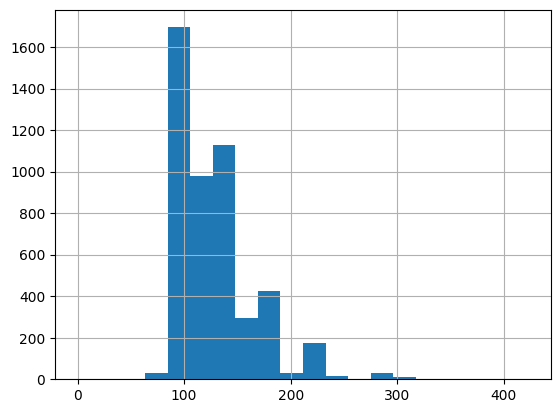

In [1655]:
bmw11.potencia.hist(bins=20);

In [1656]:
bmw12=bmw11.copy()

In [1657]:
bmw12[bmw12['potencia']==0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3753,X1,81770.0,0,diesel,white,suv,False,False,False,False,False,False,sin_info,11700.0,2018-03-01


In [1658]:
bmw12[bmw12['potencia']==0].index.tolist()

[3753]

In [1659]:
bmw12.drop(index=bmw12[bmw12['potencia']==0].index.tolist(),inplace=True)

In [1660]:
bmw12.describe()

,km,potencia,precio
count,4821.000000,4821.000000,4821.000000
mean,140464.065961,129.041693,15846.338934
std,58110.445316,38.973751,9178.752841
min,476.000000,25.000000,100.000000
25%,102856.000000,100.000000,10900.000000
50%,140904.000000,120.000000,14200.000000
75%,175118.000000,135.000000,18600.000000
max,398043.000000,423.000000,178500.000000


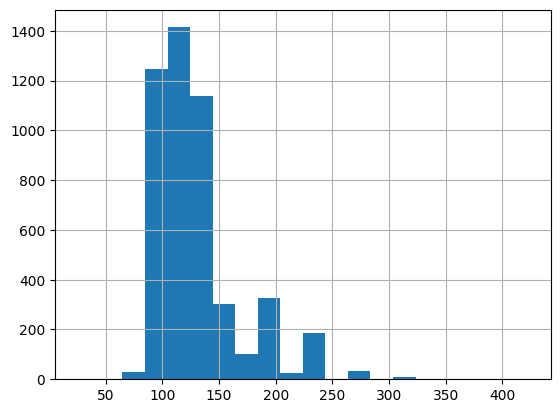

In [1661]:
bmw12.potencia.hist(bins=20);

In [1662]:
bmw12[bmw12['potencia']>400]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3589,M5,150187.0,412,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01
4134,X6 M,2970.0,423,petrol,red,suv,True,sin_info,True,False,False,True,True,82400.0,2018-04-01


In [1663]:
bmw12[bmw12['potencia']>400].index.tolist()

[3589, 4134]

In [1664]:
bmw12.drop(index=bmw12[bmw12['potencia']>400].index.tolist(),inplace=True)

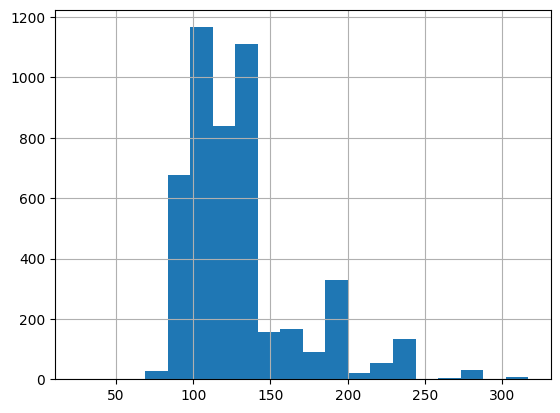

In [1665]:
bmw12.potencia.hist(bins=20);

    - 4.2.2- Variables boleanas

Al ser boleanas, no hay que hacerles ningún otro tratamiento ni evaluación

    - 4.2.3- Variables categóricas

In [1666]:
cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

    - 4.2.3.1- MODELO

In [1667]:
(bmw12[['modelo']].value_counts(normalize=True)*100).reset_index().head(15)

,modelo,proportion
0,320,15.480390
1,520,13.073252
2,318,11.724424
3,X3,9.068271
4,116,7.428927
5,X1,5.685827
6,316,4.855779
7,X5,4.793526
8,525,3.776717
9,530,3.257937


In [1668]:
(bmw12[['modelo']].value_counts(normalize=True)*100).reset_index().count()

modelo        75
proportion    75
dtype: int64

In [1669]:
bmw13=bmw12.copy()
bmw13.reset_index(drop=True,inplace=True)

In [1670]:
#Unificamos los modelos. Ej: 318 Gran Turismo para a ser solo 318
#Almacenamos los modelos simplificados en una lista.
mod_unificados=[]
for i in bmw13['modelo']:
    x=i.split()
    mod_unificados.append(x[0])
len(mod_unificados)

4819

In [1671]:
#Siguiendo el indice del df, sustituimos los valores simplificados de cada modelo en el DF
for i in bmw13['modelo'].index:
    bmw13.loc[[i],['modelo']]=mod_unificados[i]

In [1672]:
(bmw13[['modelo']].value_counts(normalize=True)*100).reset_index().head(20)

,modelo,proportion
0,320,16.995227
1,318,13.737290
2,520,13.550529
3,X3,9.068271
4,116,7.428927
5,X1,5.685827
6,X5,5.208549
7,316,4.855779
8,525,3.776717
9,530,3.631459


In [1673]:
(bmw13[['modelo']].value_counts(normalize=True)*100).reset_index().count()
#Hemos reducido de 75 a 54 modelos

modelo        54
proportion    54
dtype: int64

In [1674]:
bmw13.modelo.value_counts(normalize=True)*100
#Eliminaremos los outliers, considerando estos una representación en la muestra por debajo del 0.2% (10 resgistros o menos)

modelo
320             16.995227
318             13.737290
520             13.550529
X3               9.068271
116              7.428927
X1               5.685827
X5               5.208549
316              4.855779
525              3.776717
530              3.631459
118              2.946669
420              1.577091
518              1.369579
X6               1.058311
535              0.996057
X4               0.954555
120              0.747043
330              0.747043
218              0.705541
730              0.684789
640              0.539531
325              0.477277
740              0.373521
114              0.311268
M550             0.249014
335              0.207512
435              0.207512
216              0.166010
418              0.166010
M3               0.145258
Z4               0.124507
i3               0.124507
430              0.124507
528              0.124507
125              0.103756
328              0.103756
135              0.083005
523              0.083005
220  

In [1675]:
#Creamos dataframe de soporte con la cantidad de modelos que hay y su numero
df_sup=bmw13.modelo.value_counts().reset_index()
df_sup.head(2)

,modelo,count
0,320,819
1,318,662


In [1676]:
#creamos una lista de modelos con mesnos de 10 registros (considerados outliers)
outliers_models=df_sup[df_sup['count']<10].values[:,0].tolist()
len(outliers_models)

27

In [1677]:
outliers_models

['216',
 '418',
 'M3',
 'Z4',
 'i3',
 '430',
 '528',
 '125',
 '328',
 '135',
 '523',
 '220',
 'M235',
 'M4',
 '123',
 '750',
 '425',
 '225',
 '650',
 'M135',
 '635',
 '630',
 'i8',
 'ActiveHybrid',
 '735',
 'Active',
 '214']

In [1678]:
#eliminamos los registros con los modelos obtenidos
bmw13.drop(bmw13[bmw13['modelo'].isin(outliers_models)].index, inplace=True)

In [1679]:
bmw13.modelo.value_counts(normalize=True)*100

modelo
320     17.326000
318     14.004654
520     13.814259
X3       9.244764
116      7.573514
X1       5.796488
X5       5.309922
316      4.950286
525      3.850222
530      3.702137
118      3.004019
420      1.607785
518      1.396234
X6       1.078908
535      1.015443
X4       0.973133
330      0.761582
120      0.761582
218      0.719272
730      0.698117
640      0.550032
325      0.486567
740      0.380791
114      0.317326
M550     0.253861
435      0.211551
335      0.211551
Name: proportion, dtype: float64

In [1680]:
(bmw13[['modelo']].value_counts(normalize=True)*100).reset_index().count()
#Hemos pasadod e 54 a 27 modelos relevantes.

modelo        27
proportion    27
dtype: int64

    - 4.2.3.2- TIPO_GASOLINA

In [1681]:
bmw14=bmw13.copy()

In [1682]:
bmw14.tipo_gasolina.describe()

count       4727
unique         4
top       diesel
freq        4574
Name: tipo_gasolina, dtype: object

In [1683]:
bmw14.tipo_gasolina.value_counts()
#Existe la categoria Diesel (con D mayuscula). Las agrupamos. Eliminamos la categoría 'hybrid_petrol' al sólo haber 3 registros.

tipo_gasolina
diesel           4574
petrol            145
Diesel              5
hybrid_petrol       3
Name: count, dtype: int64

In [1684]:
bmw14['tipo_gasolina'] = bmw14['tipo_gasolina'].str.lower()
bmw14.drop(bmw14[(bmw14['tipo_gasolina'].isin(['hybrid_petrol']))].index, inplace=True)
bmw14['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4579
petrol     145
Name: count, dtype: int64

    - 4.2.3.3- COLOR

In [1685]:
bmw14.color.describe()

count      4724
unique       11
top       black
freq       1461
Name: color, dtype: object

In [1686]:
bmw14.color.value_counts()

color
black     1461
grey      1040
blue       630
white      471
otros      441
brown      301
silver     282
red         44
beige       37
green       13
orange       4
Name: count, dtype: int64

    - 4.2.3.4- TIPO_COCHE

In [1692]:
bmw14.tipo_coche.describe()

count      4724
unique        9
top       otros
freq       1423
Name: tipo_coche, dtype: object

In [1693]:
bmw14.tipo_coche.value_counts()

tipo_coche
otros          1423
estate         1096
sedan           808
suv             751
hatchback       467
subcompact       77
coupe            62
convertible      21
van              19
Name: count, dtype: int64

    - 4.2.3.5- AIRE_ACONDICIONADO

In [1694]:
bmw14.aire_acondicionado.describe()

count     4724
unique       3
top       True
freq      3393
Name: aire_acondicionado, dtype: object

In [1697]:
bmw14.aire_acondicionado.value_counts(normalize=True)*100

aire_acondicionado
True        71.824725
False       18.183743
sin_info     9.991533
Name: proportion, dtype: float64

    - 4.2.3.6- BLUETOOTH

In [1699]:
bmw14.bluetooth.describe()

count      4724
unique        3
top       False
freq       3056
Name: bluetooth, dtype: object

In [1703]:
bmw14.bluetooth.value_counts(normalize=True)*100

bluetooth
False       64.690940
True        20.173582
sin_info    15.135478
Name: proportion, dtype: float64

    - 4.2.3.7- ALERTA_LIM_VELOCIDAD

In [1704]:
bmw14.alerta_lim_velocidad.describe()

count     4724
unique       3
top       True
freq      2176
Name: alerta_lim_velocidad, dtype: object

In [1706]:
bmw14.alerta_lim_velocidad.value_counts(normalize=True)*100

alerta_lim_velocidad
True        46.062659
False       38.928874
sin_info    15.008467
Name: proportion, dtype: float64

    - 4.2.3.8- FECHA_VENTA

In [1707]:
bmw14.fecha_venta.describe()

count           4724
unique            13
top       2018-05-01
freq             780
Name: fecha_venta, dtype: object

In [1711]:
bmw14.fecha_venta.value_counts()

fecha_venta
2018-05-01    780
2018-03-01    716
2018-04-01    673
2018-06-01    593
2018-07-01    529
2018-08-01    519
2018-02-01    489
2018-09-01    217
2018-01-01    204
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: count, dtype: int64

In [1718]:
bmw14['fecha_venta'].value_counts().reset_index().sort_values(by='fecha_venta')

,fecha_venta,count
9,2007-08-01,1
12,2008-06-01,1
11,2009-04-01,1
10,2010-04-01,1
8,2018-01-01,204
6,2018-02-01,489
1,2018-03-01,716
2,2018-04-01,673
0,2018-05-01,780
3,2018-06-01,593


In [1709]:
bmw15=bmw14.copy()

In [1714]:
#Eliminamos la columna 'fecha_venta'. Las fechas no tienen continuidad entre sí y no nos aportan información.
del(bmw15['fecha_venta'])

In [1717]:
bmw15.sample(5)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
954,M550,184507.0,280,diesel,silver,otros,True,True,False,True,True,True,True,26900.0
266,520,88985.0,135,diesel,grey,estate,True,True,False,True,sin_info,True,False,18100.0
725,520,289948.0,120,diesel,blue,otros,True,True,False,False,False,True,True,7400.0
1027,520,159788.0,135,diesel,white,otros,False,True,False,True,sin_info,True,True,16400.0
1424,525,160164.0,160,diesel,blue,estate,True,True,False,True,False,True,sin_info,16900.0


In [1719]:
bmw15.reset_index(drop=True,inplace=True)

### 5.- Analisis de correlación